# Titanic survival prediction

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix


## Step 1: Load and Inspect the Dataset

In [2]:
Titanic_Data=pd.read_csv("D:\\codesoft projects\\archive\\Titanic-Dataset.csv")

In [3]:
Titanic_Data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


The dataset contains the following columns:

PassengerId: Unique identifier for each passenger<br>

Survived: Survival status (0 = No, 1 = Yes)<br>

Pclass: Passenger class (1 = 1st, 2 = 2nd, 3 = 3rd)<br>

Name: Name of the passenger<br>

Sex: Gender of the passenger<br>

Age: Age of the passenger<br>

SibSp: Number of siblings/spouses aboard the Titanic<br>

Parch: Number of parents/children aboard the Titanic<br>

Ticket: Ticket number<br>

Fare: Passenger fare<br>

Cabin: Cabin number<br>

Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [4]:
Titanic_Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
Titanic_Data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
Titanic_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
Titanic_Data.shape

(891, 12)

In [8]:
print(Titanic_Data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [9]:
Titanic_Data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
# Statistical Summary
Titanic_Data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Step 2: Preprocess the Data

In [11]:
Titanic_Data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
Titanic_Data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [13]:
# Returns a Series containing counts of unique values.
print(Titanic_Data['Age'].value_counts())

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64


###  Handling missing values

In [14]:
Titanic_Data['Age'].fillna(Titanic_Data['Age'].median(),inplace=True)

In [15]:
Titanic_Data['Cabin'].fillna('U',inplace=True)

In [16]:
Titanic_Data['Embarked'].fillna(Titanic_Data['Embarked'].mode()[0],inplace=True)

In [17]:
Titanic_Data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

###  Encoding categorical variables

In [18]:
label_Encoders={}
for column in ['Sex','Cabin','Embarked']:
    le=LabelEncoder()
    Titanic_Data[column]=le.fit_transform(Titanic_Data[column])
    label_Encoders[column]=le

### Dropping columns that won't be used for prediction

In [19]:
Titanic_Data.drop(columns=['PassengerId','Name','Ticket'],inplace=True)

In [20]:
Titanic_Data.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin         int32
Embarked      int32
dtype: object

In [21]:
numerical_columns = ['Pclass' ,'Sex','Age','SibSp','Parch' ,'Fare','Embarked']
Q1 = Titanic_Data[numerical_columns].quantile(0.25)
Q3 = Titanic_Data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5
numerical_outliers = ((Titanic_Data[numerical_columns] < (Q1 - threshold * IQR)) | (Titanic_Data[numerical_columns] > (Q3 + threshold * IQR)))
numerical_outliers_count = numerical_outliers.sum()

print("Number of outliers for each numerical column:")
print(numerical_outliers_count)

Number of outliers for each numerical column:
Pclass        0
Sex           0
Age          66
SibSp        46
Parch       213
Fare        116
Embarked      0
dtype: int64


# step 3 . Data Visualization(EDA)

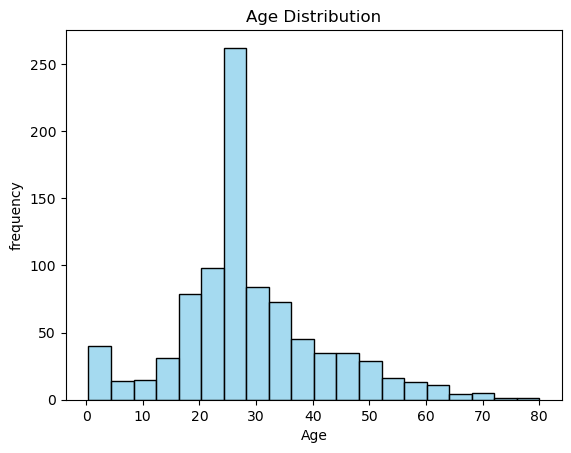

In [22]:
# plot the distribution of Age 
sns.histplot(Titanic_Data['Age'], bins=20, color='skyblue', kde=False)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('frequency')
plt.show()

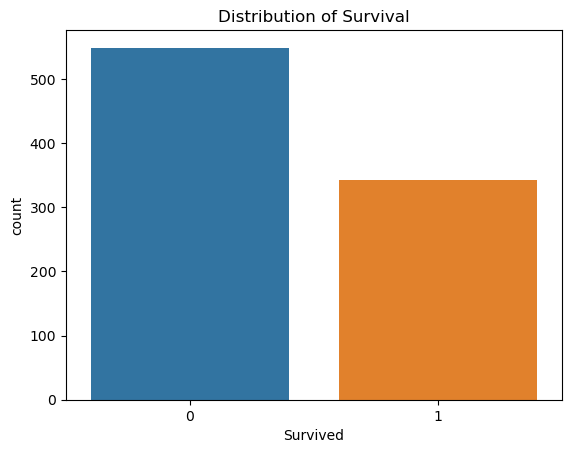

In [23]:
# Plot the distribution of passengers who survived and who did not
sns.countplot(x='Survived',data=Titanic_Data)
plt.title('Distribution of Survival')
plt.show()

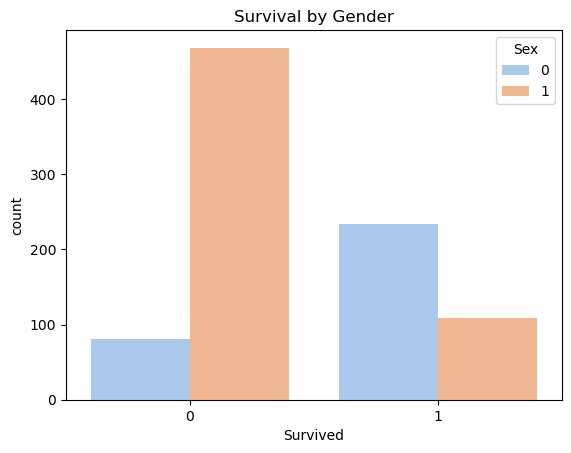

In [24]:
# Plot the distribution of survivors by gender
sns.countplot(x='Survived',hue='Sex',data=Titanic_Data,palette='pastel')
plt.title("Survival by Gender")
plt.show()

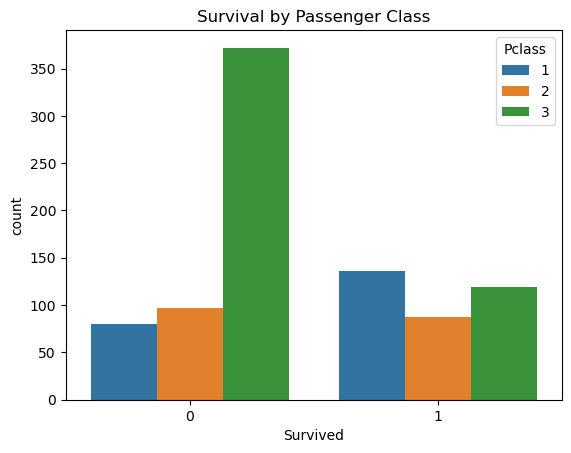

In [25]:
# Plot the distribution of survivors by passenger class
sns.countplot(x='Survived',hue='Pclass',data=Titanic_Data)
plt.title("Survival by Passenger Class")
plt.show()

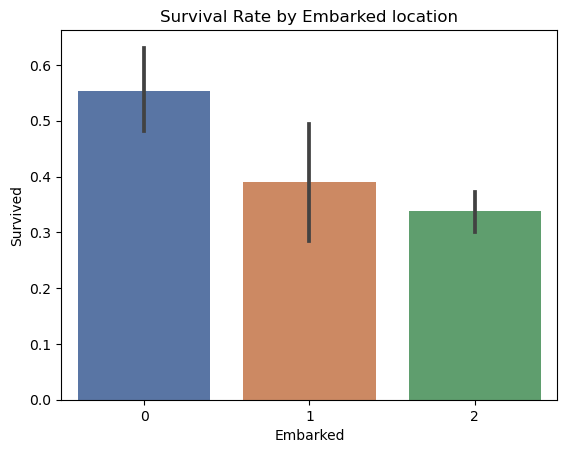

In [26]:
# Survival rate by Embarked Location
sns.barplot(x='Embarked',y='Survived',data=Titanic_Data,palette='deep')
plt.title("Survival Rate by Embarked location")
plt.show()

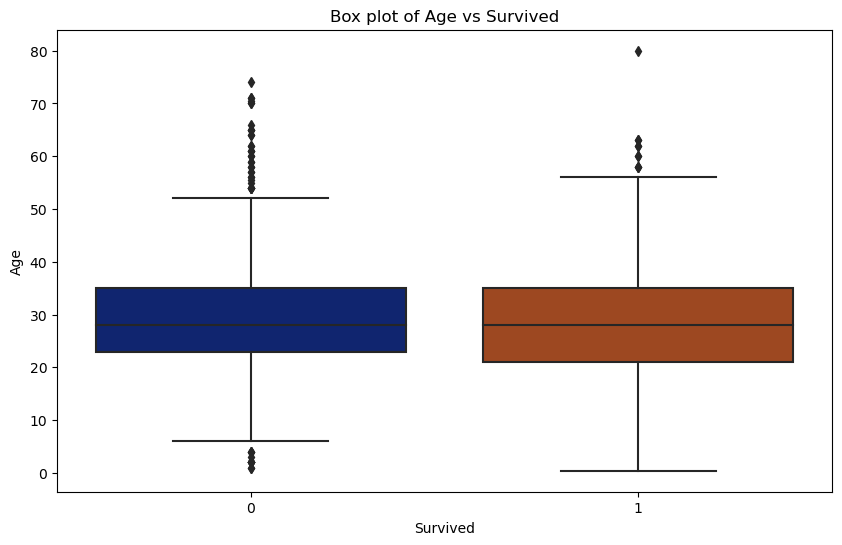

In [27]:
# Box plot for Age vs Survived
plt.figure(figsize=(10,6))
sns.boxplot(x='Survived',y='Age',data=Titanic_Data,palette='dark')
plt.title('Box plot of Age vs Survived')
plt.show()

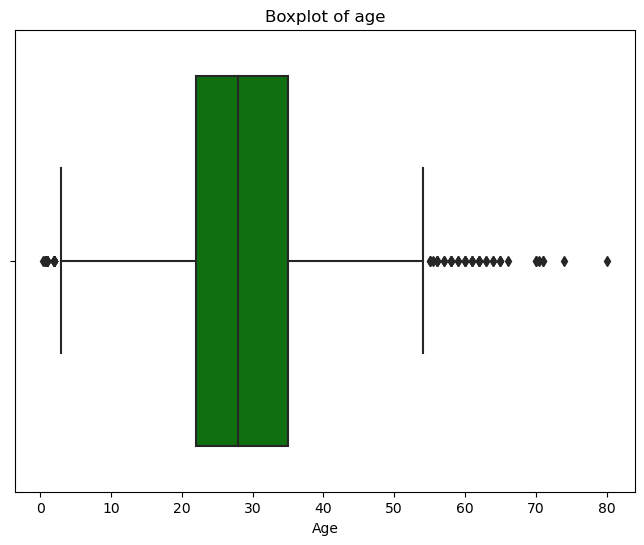

In [28]:
# Plot a boxplot for the 'Age' 
plt.figure(figsize=(8,6))
sns.boxplot(data=Titanic_Data,x='Age',color='green')
plt.title('Boxplot of age')
plt.xlabel('Age')
plt.show()


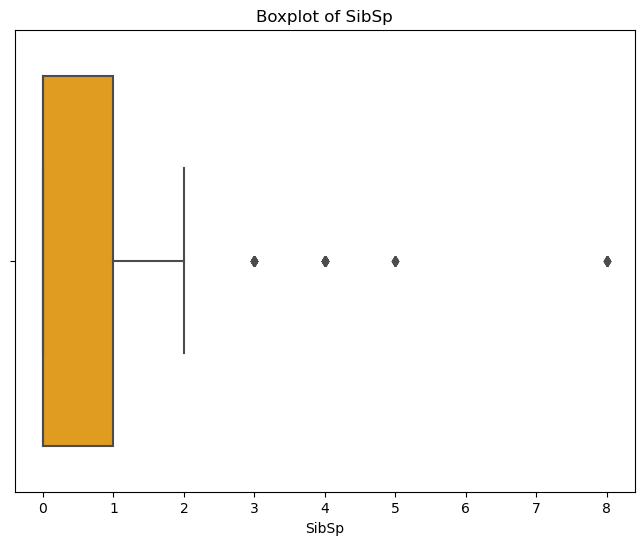

In [29]:
# Plot a boxplot for the 'sibsp' 
plt.figure(figsize=(8,6))
sns.boxplot(data=Titanic_Data,x='SibSp',color='orange')
plt.title('Boxplot of SibSp')
plt.xlabel('SibSp')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

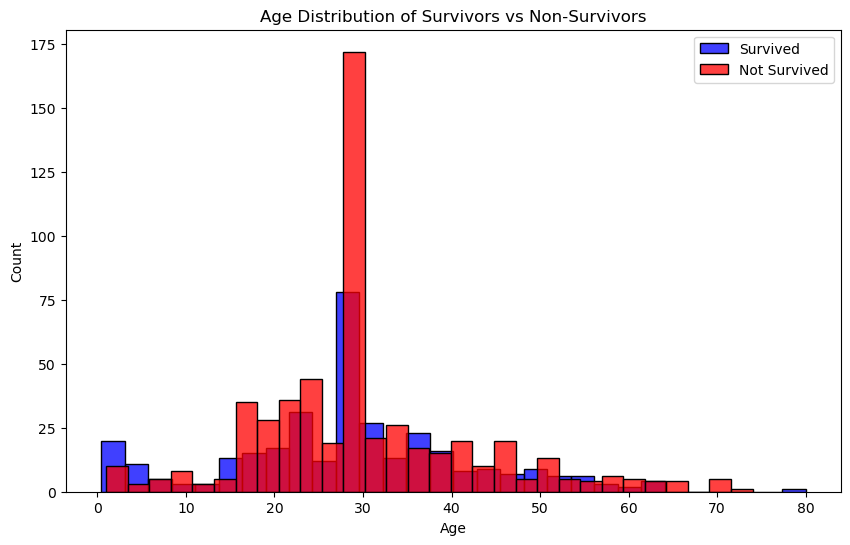

In [30]:
# Plot age distribution of survivors vs non-survivors
plt.figure(figsize=(10,6))
sns.histplot(Titanic_Data[Titanic_Data['Survived'] == 1]['Age'],bins=30,kde=False,color='blue',label='Survived')
sns.histplot(Titanic_Data[Titanic_Data['Survived'] == 0]['Age'], bins=30, kde=False, color='red', label='Not Survived')
plt.legend()
plt.title("Age Distribution of Survivors vs Non-Survivors")
plt.show

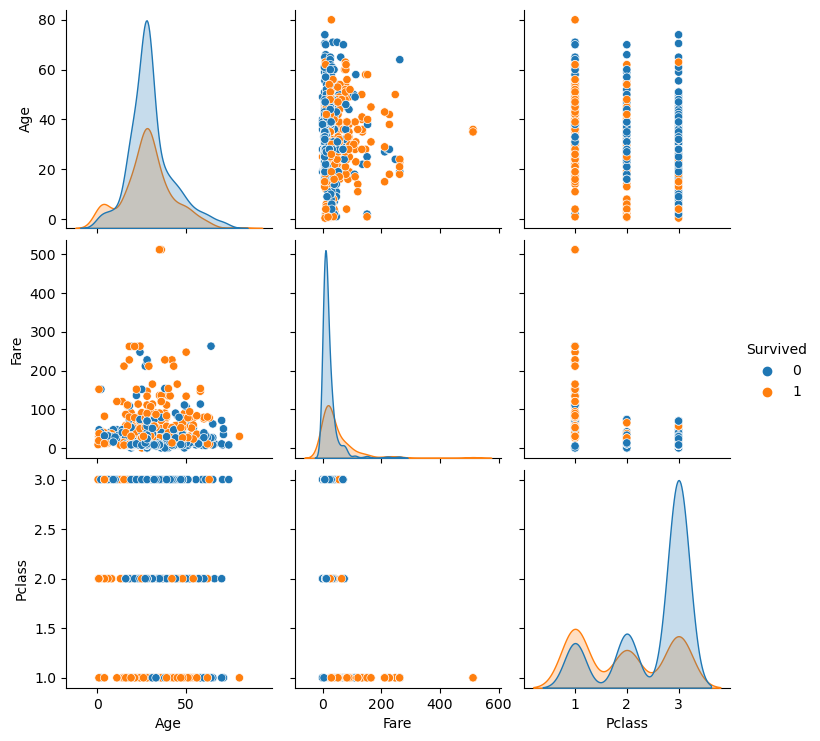

In [31]:
#Pairplot of numerical features
sns.pairplot(Titanic_Data[['Survived','Age','Fare','Pclass']],hue='Survived')
plt.show()

# Step 4: Build and Train the Model

#### splitting the data into features and target

We'll train the model on the training data and evaluate its performance on the test data

In [32]:
X=Titanic_Data.drop(columns=['Survived'])

In [33]:
y=Titanic_Data['Survived']

 X contains the features (input variables) for the model, while y contains the target (output variable) to be predicted.

#### Splitting the data into training and testing sets

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### Scaling numerical features

In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
X_test_scaled=scaler.transform(X_test)

In [37]:
# Convert the scaled data back to DataFrame
X_train=pd.DataFrame(X_train_scaled,columns=X.columns)
X_test=pd.DataFrame(X_test_scaled,columns=X.columns)

In [38]:
# Building the model
model=RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [39]:
# making prediction
y_pred=model.predict(X_test)

# Step 5: Evaluate the Model


In [40]:
# Evaluating the model
accuracy=accuracy_score(y_test,y_pred)
classification_report_text=classification_report(y_test,y_pred)
confusion_matrix_result=confusion_matrix(y_test,y_pred)

The Random Forest model achieved an accuracy of approximately 80.4% on the test data.

In [41]:
print(f"Accuracy : {accuracy:.2f}")
print("Classification Report :")
print(classification_report_text)
print("Confusion Matrix :")
print(confusion_matrix_result)

Accuracy : 0.80
Classification Report :
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179

Confusion Matrix :
[[90 15]
 [20 54]]


### 
Precision for class 0 (did not survive): 82%<br>
Recall for class 0: 86%<br>
F1-Score for class 0: 84%<br>
Precision for class 1 (survived): 78%<br>
Recall for class 1: 73%<br>
F1-Score for class 1: 76%<br>
    
The confusion matrix shows that the model correctly identified 90 non-survivors and 54 survivors. There were 15 false positives (predicted survival but did not survive) and 20 false negatives (predicted not survival but survived).

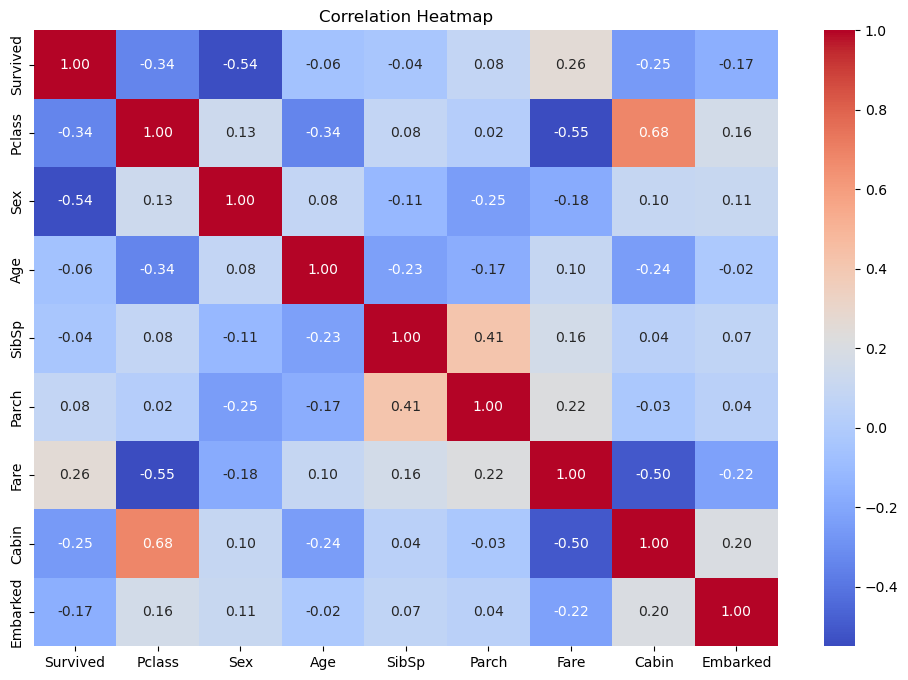

In [42]:
# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(Titanic_Data.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

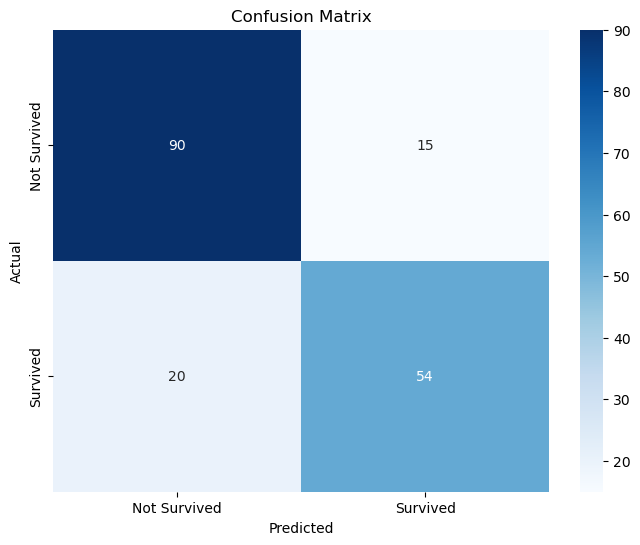

In [43]:
# # Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Conclusion:

In this project, we aimed to predict the survival of passengers on the Titanic based on various features such as age, sex, passenger class, and fare. We loaded and explored the Titanic dataset, preprocessed the data by handling missing values and encoding categorical variables, and visualized the distribution of survival rates across different features.<br>


We then split the data into training and testing sets, scaled the numerical features, and trained a Random Forest Classifier model on the training data. The model achieved an accuracy of approximately 80.4% on the test data, indicating a good performance.<br>


The classification report and confusion matrix revealed that the model performed well in predicting both survival and non-survival cases, with a precision of 82% for non-survivors and 78% for survivors. The model correctly identified 90 non-survivors and 54 survivors, with 15 false positives and 20 false negatives.